In [3]:
#IMPORTING LIBRARIES

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#LOADING IN DATA

SuperGrocery=pd.read_csv("C:/Users/HELLO/Desktop/Supermart Grocery Sales - Retail Analytics Dataset.csv",index_col="Order ID")
SuperGrocery

,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
Order ID,,,,,,,,,,
OD1,Harish,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254,0.12,401.28,Tamil Nadu
OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,149.80,Tamil Nadu
OD3,Hussain,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360,0.21,165.20,Tamil Nadu
OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,South,896,0.25,89.60,Tamil Nadu
OD5,Ridhesh,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355,0.26,918.45,Tamil Nadu
...,...,...,...,...,...,...,...,...,...,...
OD9990,Sudeep,"Eggs, Meat & Fish",Eggs,Madurai,12/24/2015,West,945,0.16,359.10,Tamil Nadu
OD9991,Alan,Bakery,Biscuits,Kanyakumari,07-12-2015,West,1195,0.26,71.70,Tamil Nadu
OD9992,Ravi,Food Grains,Rice,Bodi,06-06-2017,West,1567,0.16,501.44,Tamil Nadu


In [5]:
#CHECKING THE COLUMNS

SuperGrocery.columns

Index(['Customer Name', 'Category', 'Sub Category', 'City', 'Order Date',
       'Region', 'Sales', 'Discount', 'Profit', 'State'],
      dtype='object')

In [6]:
#CHECKING THE COLUMN TYPES OF THE DATA

SuperGrocery.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9994 entries, OD1 to OD9994
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Customer Name  9994 non-null   object 
 1   Category       9994 non-null   object 
 2   Sub Category   9994 non-null   object 
 3   City           9994 non-null   object 
 4   Order Date     9994 non-null   object 
 5   Region         9994 non-null   object 
 6   Sales          9994 non-null   int64  
 7   Discount       9994 non-null   float64
 8   Profit         9994 non-null   float64
 9   State          9994 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 858.9+ KB


In [7]:
#CHANGING THE "ORDER DATE" COLUMN TO A datetime TYPE

SuperGrocery["Order Date"]=pd.to_datetime(SuperGrocery["Order Date"])

In [8]:
#CREATING A NEW COLUMN TO SPLIT DAY NAME

SuperGrocery["Day_Name"]=SuperGrocery["Order Date"].dt.day_name()

In [9]:
#GETTING THE SALES PER DAY

DaySales=SuperGrocery.groupby("Day_Name")["Sales"].sum()
DaySales

Day_Name
Friday       1638367
Monday       2428324
Saturday     2724409
Sunday       2615647
Thursday      807635
Tuesday      2855751
Wednesday    1886849
Name: Sales, dtype: int64

In [10]:
#ASSINGNING VARAIBLES TO THE SALES PER DAY TO PLOT CHART

Name=DaySales.index
Number=DaySales.values

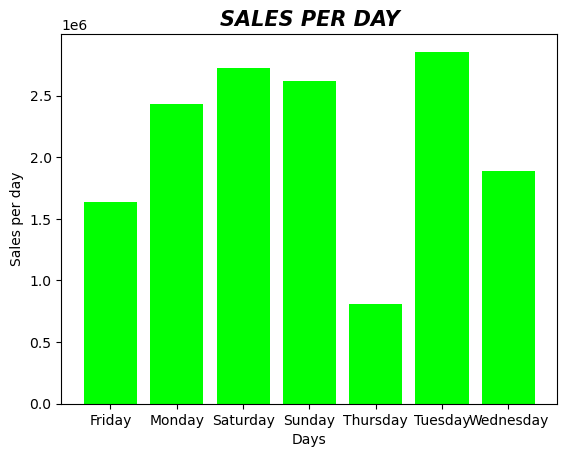

In [76]:
#PLOTTING OUR SALES PER DAY CHART

plt.bar(Name,Number,color="lime")
plt.title("SALES PER DAY",fontstyle="italic",fontweight="bold",fontsize=15,c="black")
plt.xlabel("Days")
plt.ylabel("Sales per day")
plt.savefig("Saales Per Day.png")
plt.show()

In [36]:
#GETTING THE TOP5 SALES

Top5=SuperGrocery.sort_values("Sales",ascending=False).head(5)
Top5

,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State,Day_Name,Year
Order ID,,,,,,,,,,,,
OD9852,Sundar,Beverages,Health Drinks,Cumbum,2018-10-12,Central,2500,0.25,325.0,Tamil Nadu,Friday,2018
OD8250,Komal,Bakery,Cakes,Trichy,2016-07-31,South,2500,0.13,225.0,Tamil Nadu,Sunday,2016
OD1413,Peer,Fruits & Veggies,Organic Vegetables,Kanyakumari,2015-12-12,West,2500,0.14,1025.0,Tamil Nadu,Saturday,2015
OD9973,Vinne,Snacks,Chocolates,Perambalur,2018-02-20,West,2500,0.19,325.0,Tamil Nadu,Tuesday,2018
OD2444,Ravi,Snacks,Chocolates,Dindigul,2018-10-30,Central,2500,0.33,300.0,Tamil Nadu,Tuesday,2018


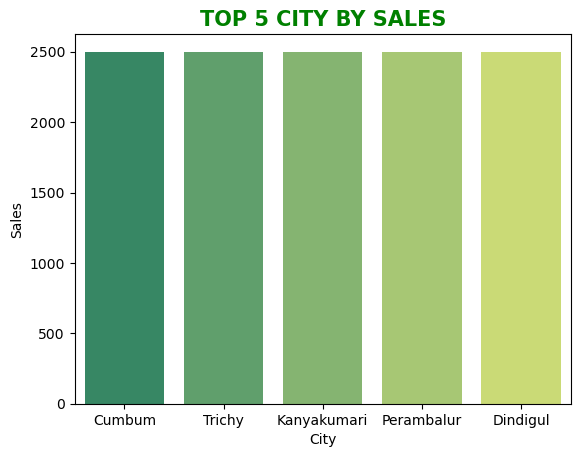

In [77]:
#PLOTTING SALES BY CITY CHART SEABORN

sns.barplot(x=Top5["City"],y=Top5["Sales"],data=Top5,palette="summer")
plt.title("TOP 5 CITY BY SALES",fontsize=15,fontweight="bold",c="g")
plt.xlabel("City")
plt.ylabel("Sales")
plt.savefig("T5 city by sales.png")
plt.show()

In [56]:
#GROUPING THE REGION BY THEIR PROFITS

RegDis=SuperGrocery.groupby("Region")["Discount"].sum()
RegDis

Region
Central    531.33
East       648.41
North        0.12
South      367.15
West       719.80
Name: Discount, dtype: float64

In [57]:
#ASSIGNING A VARIABLE TO PLOT A CHART

Name4=RegDis.index
Number4=RegDis.values

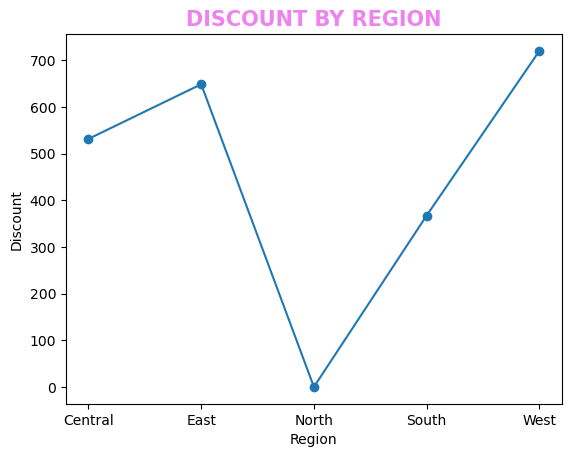

In [78]:
#PLOTTING A LINE CHART FOR DISCOUNT BY REGION

plt.plot(Name4,Number4,marker="o")
plt.title("DISCOUNT BY REGION",fontsize=15,fontweight="bold",c="violet")
plt.xlabel("Region")
plt.ylabel("Discount")
plt.savefig("DisReg.png")
plt.show()

In [13]:
#GETTING THE TOP10 HIGHEST PROFIT

Top10=SuperGrocery.sort_values("Profit",ascending=False).head(10)
Top10

,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State,Day_Name
Order ID,,,,,,,,,,,
OD3160,Haseena,Bakery,Cakes,Cumbum,2017-09-04,Central,2491,0.26,1120.95,Tamil Nadu,Monday
OD3468,Verma,Fruits & Veggies,Fresh Fruits,Theni,2015-02-16,Central,2490,0.24,1120.50,Tamil Nadu,Monday
OD3437,Yadav,Bakery,Breads & Buns,Theni,2015-12-16,Central,2469,0.29,1111.05,Tamil Nadu,Wednesday
OD8135,Aditi,Bakery,Biscuits,Coimbatore,2016-09-18,East,2452,0.18,1103.40,Tamil Nadu,Sunday
OD9783,Komal,Snacks,Cookies,Karur,2017-03-29,Central,2450,0.21,1102.50,Tamil Nadu,Wednesday
OD1116,Vinne,"Eggs, Meat & Fish",Chicken,Madurai,2017-07-04,West,2439,0.30,1097.55,Tamil Nadu,Tuesday
OD4944,Willams,Beverages,Soft Drinks,Ramanadhapuram,2018-11-21,Central,2434,0.29,1095.30,Tamil Nadu,Wednesday
OD1305,Akash,Fruits & Veggies,Organic Vegetables,Salem,2017-12-01,East,2432,0.34,1094.40,Tamil Nadu,Friday
OD1808,Esther,Bakery,Biscuits,Trichy,2018-11-21,West,2429,0.11,1093.05,Tamil Nadu,Wednesday


In [14]:
#GROUPING THE CUSTOMERS WITH THEIR PROFIT

CustProfit=Top10.groupby("Customer Name")["Profit"].sum()
CustProfit

Customer Name
Aditi      1103.40
Akash      1094.40
Esther     1093.05
Haseena    1120.95
Komal      1102.50
Sabeela    1090.32
Verma      1120.50
Vinne      1097.55
Willams    1095.30
Yadav      1111.05
Name: Profit, dtype: float64

In [15]:
#ASSIGNING VARIABLES TO THE SALES PER DAY TO PLOT CHART

Name1=CustProfit.index
Number1=CustProfit.values

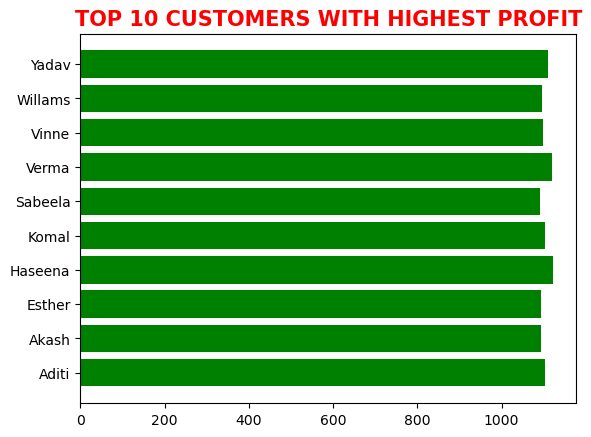

In [79]:
#PLOTTING THE CHART FOR CUSTOMERS WITH THE HIGHEST PROFIT (TOP10)

plt.barh(Name1,Number1,color="g")
plt.title("TOP 10 CUSTOMERS WITH HIGHEST PROFIT",fontsize=15,fontweight="bold",c="#FF0000")
plt.savefig("T10 cust.png")
plt.show()

In [17]:
#CREATING A NEW COLUMN TO SPLIT THE YEAR

SuperGrocery["Year"]=SuperGrocery["Order Date"].dt.year

In [18]:
#GETTING THE SALES PER YEAR

Year=SuperGrocery.groupby("Year")["Sales"].sum()
Year

Year
2015    2975599
2016    3131959
2017    3871912
2018    4977512
Name: Sales, dtype: int64

In [19]:
#ASSIGNING A VARIABLE TO PLOT A CHART

Name3=Year.index
Number3=Year.values

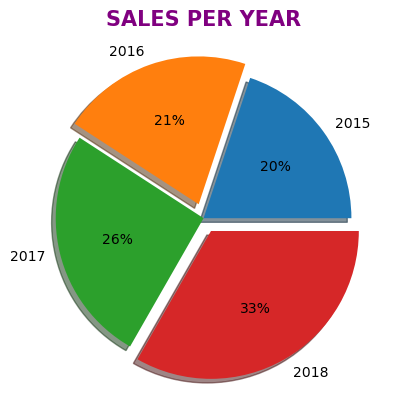

In [80]:
#PLOTTING A PIE CHART FOR THE CATEGORY BY YEAR

plt.pie(Number3,labels=Name3,autopct="%1.0f%%",shadow=True,explode=[0,0.1,0,0.1])
plt.title("SALES PER YEAR",fontsize=15,fontweight="bold",c="purple")
plt.savefig("SPY.png")
plt.show()

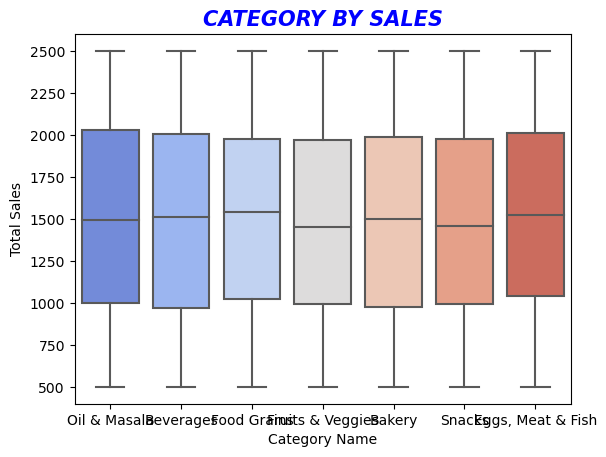

In [81]:
#PLOTTING THE CHART OF CATEGORY BY SALES USING SEABORN

sns.boxplot(x=SuperGrocery["Category"],y=SuperGrocery["Sales"],data=SuperGrocery,palette="coolwarm")
plt.title("CATEGORY BY SALES",fontsize=15,fontweight="bold",fontstyle="italic",c="b")
plt.xlabel("Category Name")
plt.ylabel("Total Sales")
plt.savefig("CatSales.png")
plt.show()

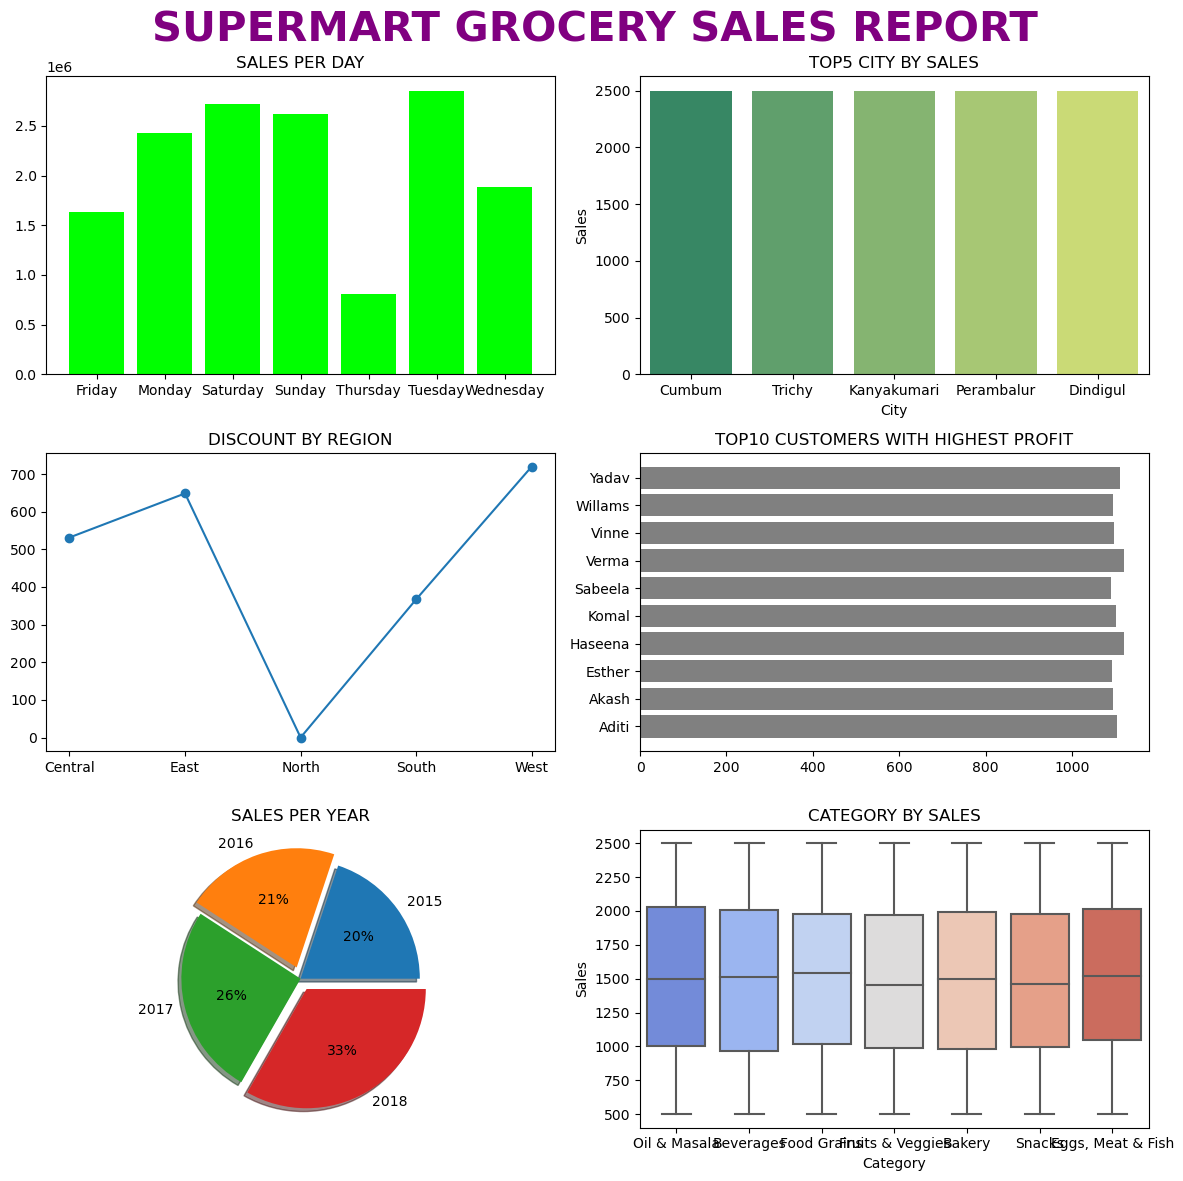

In [82]:
#PLOTTING THE CHARTS IN A SUBPLOTS

fig,SuperMart=plt.subplots(nrows=3,ncols=2,figsize=(12,12))
fig.suptitle("SUPERMART GROCERY SALES REPORT",fontweight="bold",c="#800080",fontsize=30)
SuperMart[0,0].bar(Name,Number,color="lime")
sns.barplot(x=Top5["City"],y=Top5["Sales"],data=Top5,palette="summer",ax=SuperMart[0,1])
SuperMart[1,0].plot(Name4,Number4,marker="o")
SuperMart[1,1].barh(Name1,Number1,color="grey")
SuperMart[2,0].pie(Number3,labels=Name3,autopct="%1.0f%%",shadow=True,explode=[0,0.1,0,0.1])
sns.boxplot(x=SuperGrocery["Category"],y=SuperGrocery["Sales"],data=SuperGrocery,palette="coolwarm",ax=SuperMart[2,1])
SuperMart[0,0].set(title="SALES PER DAY")
SuperMart[0,1].set(title="TOP5 CITY BY SALES")
SuperMart[1,0].set(title="DISCOUNT BY REGION")
SuperMart[1,1].set(title="TOP10 CUSTOMERS WITH HIGHEST PROFIT")
SuperMart[2,0].set(title="SALES PER YEAR")
SuperMart[2,1].set(title="CATEGORY BY SALES")
plt.tight_layout()
plt.savefig("SuperMart.png")
plt.show()